In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score



######## Evaluation Metrics ########
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    
    classification_report,
)
import time


In [3]:
df = pd.read_csv(r'Practical_Exam/card_transdata.csv')

# knowing data structure

In [4]:
df.head()

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0,231.511426,1.244560,7.783760,4.0,4.0,0.0,0.0,NOT_fraud
1,1,184.463512,1.109012,7.132039,4.0,3.0,0.0,0.0,NOT_fraud
2,2,178.724649,1.738573,6.265534,4.0,3.0,0.0,1.0,NOT_fraud
3,3,175.881134,6.533464,6.200483,4.0,4.0,0.0,1.0,NOT_fraud
4,4,217.824506,1.499906,8.060587,4.0,4.0,0.0,1.0,NOT_fraud


In [5]:
df.tail(20)

,Unnamed: 0,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,999995,175.840670,1.046071,7.464618,4.0,4.0,0.0,0.0,NOT_fraud
999996,999996,193.506296,3.617324,8.616123,4.0,4.0,0.0,0.0,NOT_fraud
999997,999997,176.548427,2.406107,6.055895,4.0,4.0,0.0,1.0,NOT_fraud
999998,999998,177.892299,1.175443,6.313642,4.0,3.0,0.0,1.0,NOT_fraud
999999,999999,231.741695,1.251530,6.224740,4.0,4.0,0.0,1.0,NOT_fraud
1000000,1000000,231.511426,1.244560,7.783760,4.0,4.0,0.0,0.0,NOT_fraud
1000001,1000001,231.511426,1.244560,7.783760,4.0,4.0,0.0,0.0,NOT_fraud
1000002,1000002,231.511426,1.244560,7.783760,4.0,4.0,0.0,0.0,NOT_fraud
1000003,1000003,179.219977,14.194493,5.902588,4.0,3.0,0.0,0.0,NOT_fraud
1000004,1000004,179.219977,14.194493,5.902588,4.0,3.0,0.0,0.0,NOT_fraud


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000015 entries, 0 to 1000014
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Unnamed: 0                      1000015 non-null  int64  
 1   distance_from_home              1000015 non-null  float64
 2   distance_from_last_transaction  1000009 non-null  float64
 3   ratio_to_median_purchase_price  1000009 non-null  float64
 4   repeat_retailer                 1000009 non-null  float64
 5   used_chip                       1000009 non-null  float64
 6   used_pin_number                 1000009 non-null  float64
 7   online_order                    1000009 non-null  float64
 8   fraud                           1000009 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 68.7+ MB


In [7]:
df.drop(columns =['Unnamed: 0'],inplace= True)

In [8]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,1.000015e+06,1.000009e+06,1.000009e+06,1.000009e+06,1.000009e+06,1.000009e+06,1.000009e+06
mean,2.002611e+02,5.969975e+00,7.661992e+00,3.881537e+00,3.350399e+00,1.006071e-01,6.505461e-01
std,6.539212e+01,2.584299e+01,2.799580e+00,3.231556e-01,4.770951e-01,3.008079e-01,4.767977e-01
min,3.000000e+00,9.335383e-01,5.842219e+00,3.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
25%,1.775115e+02,1.230092e+00,6.313485e+00,4.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00
50%,1.836013e+02,1.932079e+00,6.835530e+00,4.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00
75%,1.993775e+02,4.289278e+00,7.934184e+00,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00
max,1.080636e+04,1.185204e+04,2.736408e+02,4.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00


In [9]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    6
ratio_to_median_purchase_price    6
repeat_retailer                   6
used_chip                         6
used_pin_number                   6
online_order                      6
fraud                             6
dtype: int64

In [10]:
df.duplicated().sum()

14

# EDA

In [11]:
train_set , test_set = train_test_split(df,test_size = 0.2, random_state= 48)

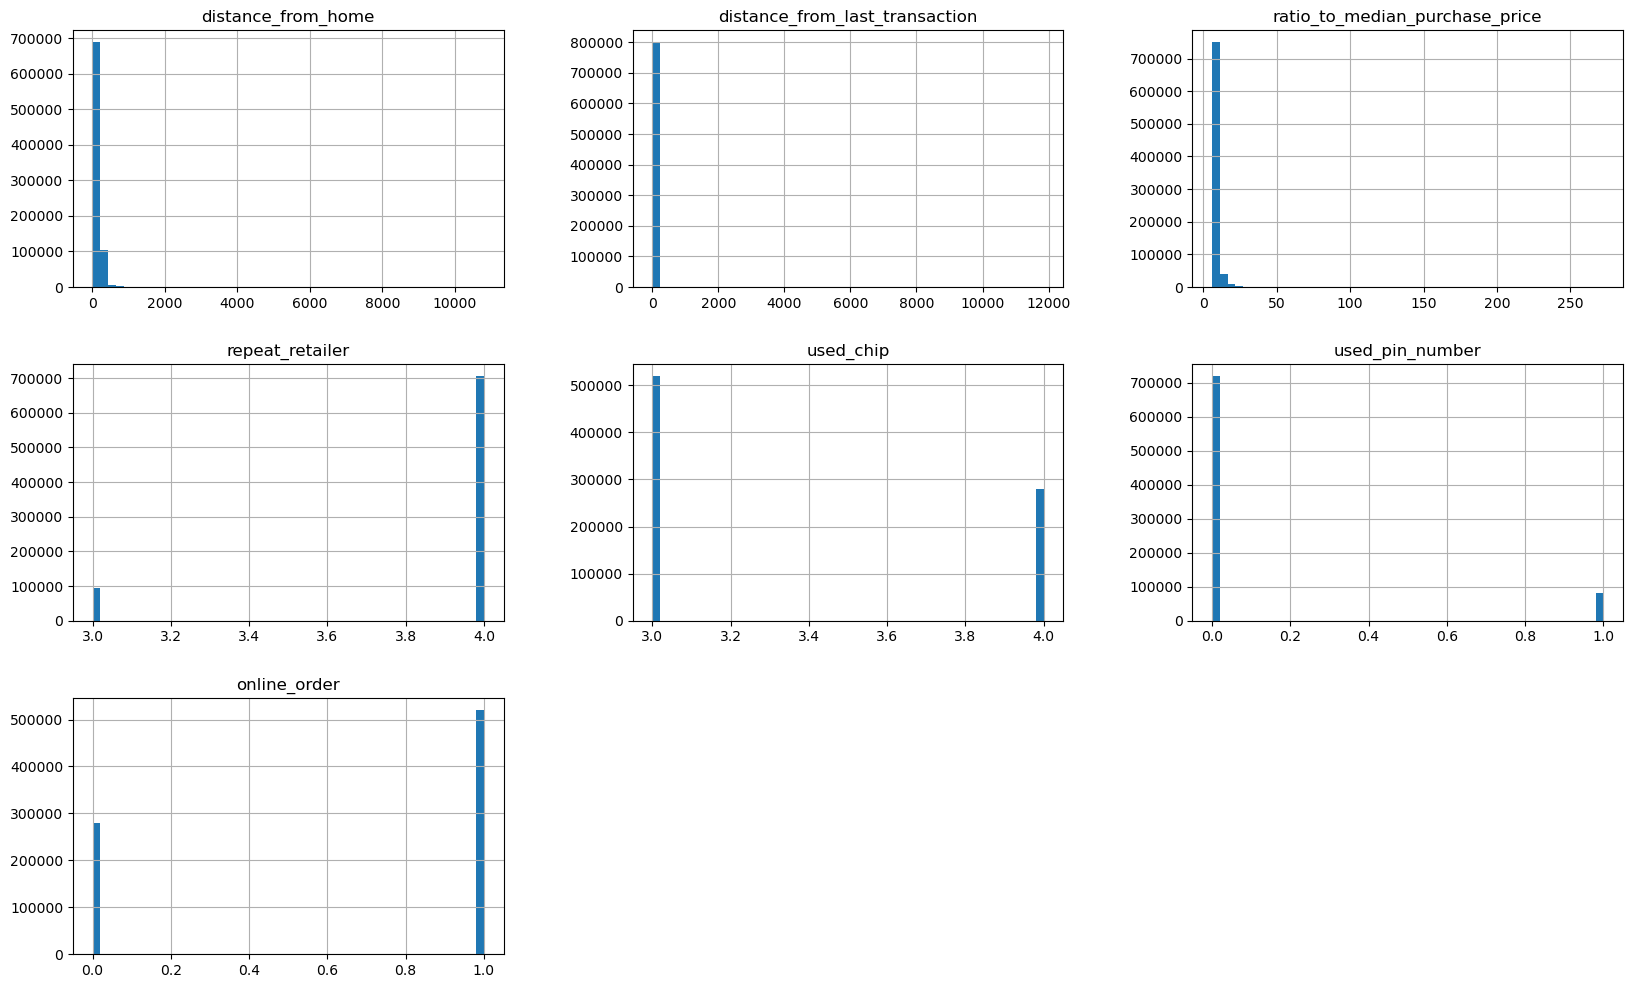

In [12]:
train_set.hist(bins= 50 , figsize= (20,12))
plt.show()

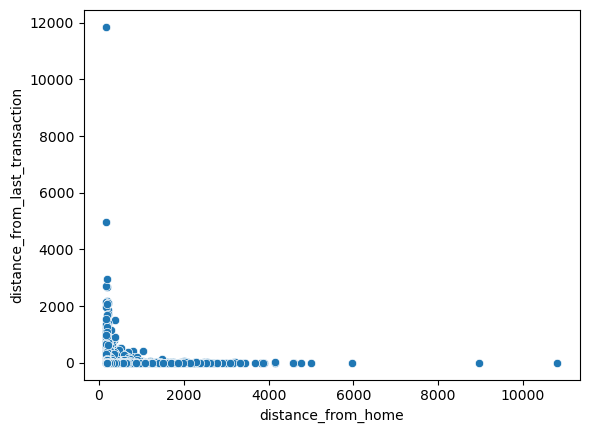

In [13]:
sns.scatterplot(data= train_set, x = 'distance_from_home',y= 'distance_from_last_transaction')
plt.show()

In [14]:
corr_matrix=train_set.corr()
corr_matrix

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
distance_from_home,1.000000,-0.000041,-0.000981,0.142042,0.000088,-0.001098,-0.001376
distance_from_last_transaction,-0.000041,1.000000,0.001203,-0.001025,0.001435,-0.000675,-0.000007
ratio_to_median_purchase_price,-0.000981,0.001203,1.000000,0.001775,0.000350,0.001360,-0.000580
repeat_retailer,0.142042,-0.001025,0.001775,1.000000,-0.001516,-0.000627,-0.001112
used_chip,0.000088,0.001435,0.000350,-0.001516,1.000000,-0.001359,-0.000837
used_pin_number,-0.001098,-0.000675,0.001360,-0.000627,-0.001359,1.000000,0.000423
online_order,-0.001376,-0.000007,-0.000580,-0.001112,-0.000837,0.000423,1.000000


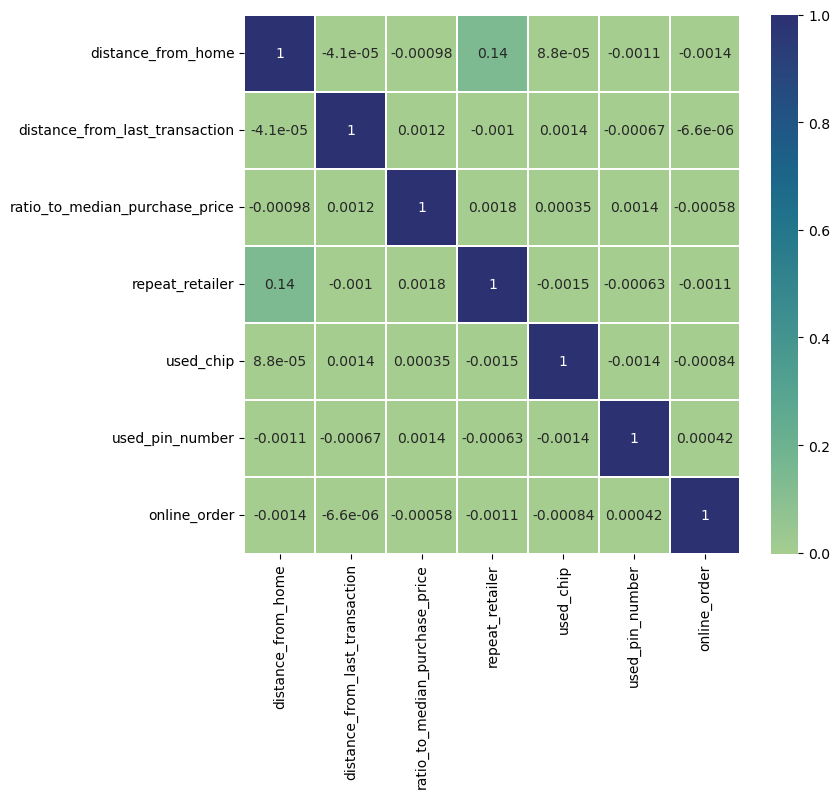

In [15]:
fig,ax = plt.subplots(1,1 , figsize =(8,7))
sns.heatmap(corr_matrix,annot= True, cmap = 'crest',linewidths=0.05,ax=ax)
plt.show()

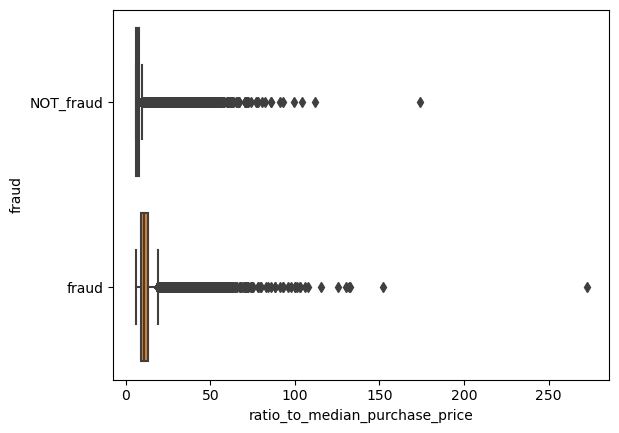

In [16]:
sns.boxplot(data=train_set ,x = 'ratio_to_median_purchase_price',y = 'fraud')
plt.show()

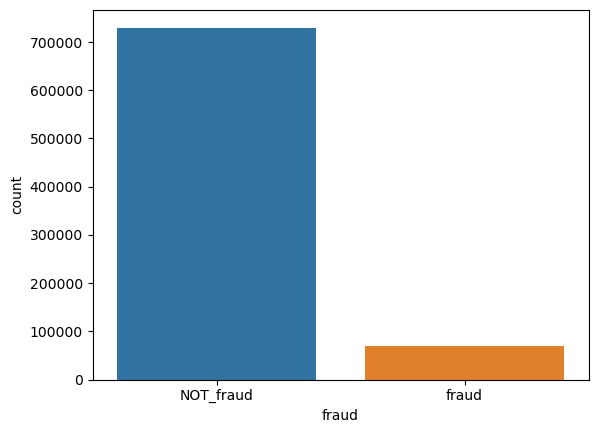

In [17]:
sns.countplot(data=train_set, x = 'fraud')
plt.show()

In [18]:
q1 = df['ratio_to_median_purchase_price'].quantile(0.25)
q2 = df['ratio_to_median_purchase_price'].quantile(0.5)
q3 = df['ratio_to_median_purchase_price'].quantile(0.75)

iqr = q3 - q1 

upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr

upper_df = train_set[train_set['ratio_to_median_purchase_price'] > upper_fence]
(upper_df.shape[0]/train_set.shape[0]) * 100

8.443623345649815

In [19]:
def percetage_of_nan(df,col):
    num = df[col].isna().sum()
    tot = df.shape[0]
    return f"The percentage of NAN values in the {col} is {(num/tot)*100} %\n"

In [20]:
for i in train_set.columns:
    print(percetage_of_nan(train_set,i))

The percentage of NAN values in the distance_from_home is 0.0 %

The percentage of NAN values in the distance_from_last_transaction is 0.0004999925001124983 %

The percentage of NAN values in the ratio_to_median_purchase_price is 0.0004999925001124983 %

The percentage of NAN values in the repeat_retailer is 0.0004999925001124983 %

The percentage of NAN values in the used_chip is 0.0004999925001124983 %

The percentage of NAN values in the used_pin_number is 0.0004999925001124983 %

The percentage of NAN values in the online_order is 0.0004999925001124983 %

The percentage of NAN values in the fraud is 0.0004999925001124983 %



In [21]:
for i in train_set.columns:
    train_set.dropna(subset= i, axis= 0,inplace=True)

In [22]:
for i in train_set.columns:
    print(percetage_of_nan(train_set,i))

The percentage of NAN values in the distance_from_home is 0.0 %

The percentage of NAN values in the distance_from_last_transaction is 0.0 %

The percentage of NAN values in the ratio_to_median_purchase_price is 0.0 %

The percentage of NAN values in the repeat_retailer is 0.0 %

The percentage of NAN values in the used_chip is 0.0 %

The percentage of NAN values in the used_pin_number is 0.0 %

The percentage of NAN values in the online_order is 0.0 %

The percentage of NAN values in the fraud is 0.0 %



In [23]:
train_set.duplicated().sum()

5

In [24]:
train_set.drop_duplicates(inplace=True)

In [25]:
train_set.shape[0]

800003

In [26]:
copy_train = train_set.iloc[:,:-1]
y_train = train_set.iloc[:,-1]
train_set= train_set.iloc[:,:-1]



In [27]:
copy_train.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
count,800003.000000,800003.000000,800003.000000,800003.000000,800003.000000,800003.000000,800003.000000
mean,200.317361,5.992409,7.661085,3.881753,3.350610,0.100713,0.650790
std,65.961651,26.700142,2.792576,0.322901,0.477161,0.300949,0.476721
min,173.638444,0.933718,5.842219,3.000000,3.000000,0.000000,0.000000
25%,177.514150,1.230043,6.313248,4.000000,3.000000,0.000000,0.000000
50%,183.601274,1.930427,6.834683,4.000000,3.000000,0.000000,1.000000
75%,199.389009,4.284873,7.934156,4.000000,4.000000,0.000000,1.000000
max,10806.357242,11852.037985,272.527512,4.000000,4.000000,1.000000,1.000000


In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_train_encoded

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(copy_train)
X_train_scaled

array([[-0.38308707, -0.16151236, -0.41609249, ..., -0.73478332,
        -0.33465283,  0.73252566],
       [ 0.10731366, -0.17006107, -0.2626747 , ..., -0.73478332,
        -0.33465283, -1.36513989],
       [-0.34226449, -0.18069233, -0.22404813, ...,  1.36094543,
        -0.33465283,  0.73252566],
       ...,
       [-0.33175185, -0.18494533, -0.51365291, ..., -0.73478332,
        -0.33465283,  0.73252566],
       [-0.11783373, -0.18218264,  0.06455729, ...,  1.36094543,
        -0.33465283, -1.36513989],
       [-0.2438063 , -0.17923749, -0.1692899 , ..., -0.73478332,
        -0.33465283, -1.36513989]])

# Make Pipelines

In [30]:
from sklearn.pipeline import Pipeline

preprocessing = Pipeline([
    ("standardize", StandardScaler())
])

In [31]:
train_set_preprocessed = preprocessing.fit_transform(train_set)

# Modeling

In [32]:
# dummy classifier for our reference

dc = DummyClassifier()

cross_val = cross_val_score(dc , train_set_preprocessed , y_train_encoded,scoring='f1',cv = 10)
cross_val.mean()

0.0

In [33]:
# logistic regression 
lr = LogisticRegression()
cross_val = cross_val_score(lr , train_set_preprocessed , y_train_encoded,scoring='f1',cv = 10)
cross_val.mean()

0.7170453443855563

In [34]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier()
]

In [35]:
models_df = pd.DataFrame(columns=['time_for_training','cross_validatoin_f1'])

In [36]:
# iterate over models, train them, append results
for model in models:
    # start timer
    start = time.time()
    # Train the model
    cross_val = cross_val_score(model , train_set_preprocessed , y_train_encoded,scoring='f1',cv = 3)
    # end timer
    end = time.time()
    # estimated time
    estimated_time = round(end-start,2)
    # evaluate model
    

    models_df.loc[model.__class__.__name__] = [estimated_time, cross_val.mean()]

In [37]:
models_df

,time_for_training,cross_validatoin_f1
DecisionTreeClassifier,4.13,0.999864
RandomForestClassifier,181.87,0.999921
GradientBoostingClassifier,358.84,0.998885
